Установка необходимых библиотек (если не установлены)

In [1]:
!pip install -U scikit-learn
!pip install numpy
!pip install matplotlib
!pip install seaborn

print("\nУстановка успешна")

Defaulting to user installation because normal site-packages is not writeable

[notice] A new release of pip is available: 23.2.1 -> 23.3.1
[notice] To update, run: python3 -m pip install --upgrade pip
Defaulting to user installation because normal site-packages is not writeable

[notice] A new release of pip is available: 23.2.1 -> 23.3.1
[notice] To update, run: python3 -m pip install --upgrade pip
Defaulting to user installation because normal site-packages is not writeable

[notice] A new release of pip is available: 23.2.1 -> 23.3.1
[notice] To update, run: python3 -m pip install --upgrade pip
Defaulting to user installation because normal site-packages is not writeable

[notice] A new release of pip is available: 23.2.1 -> 23.3.1
[notice] To update, run: python3 -m pip install --upgrade pip

Установка успешна


Считывание файла

In [1]:
import numpy as np
import os

file_path = "s1.txt"
ram_capacity = 2**20

if file_path.endswith('.txt') and os.path.isfile(file_path) and os.path.getsize(file_path) <= ram_capacity:
    data = np.loadtxt(file_path)
    print(data)
else:
    print("НЕТ ТАКОГО ФАЙЛА")

[[664159. 550946.]
 [665845. 557965.]
 [597173. 575538.]
 ...
 [650661. 861267.]
 [599647. 858702.]
 [684091. 842566.]]


Вывод исходных данных

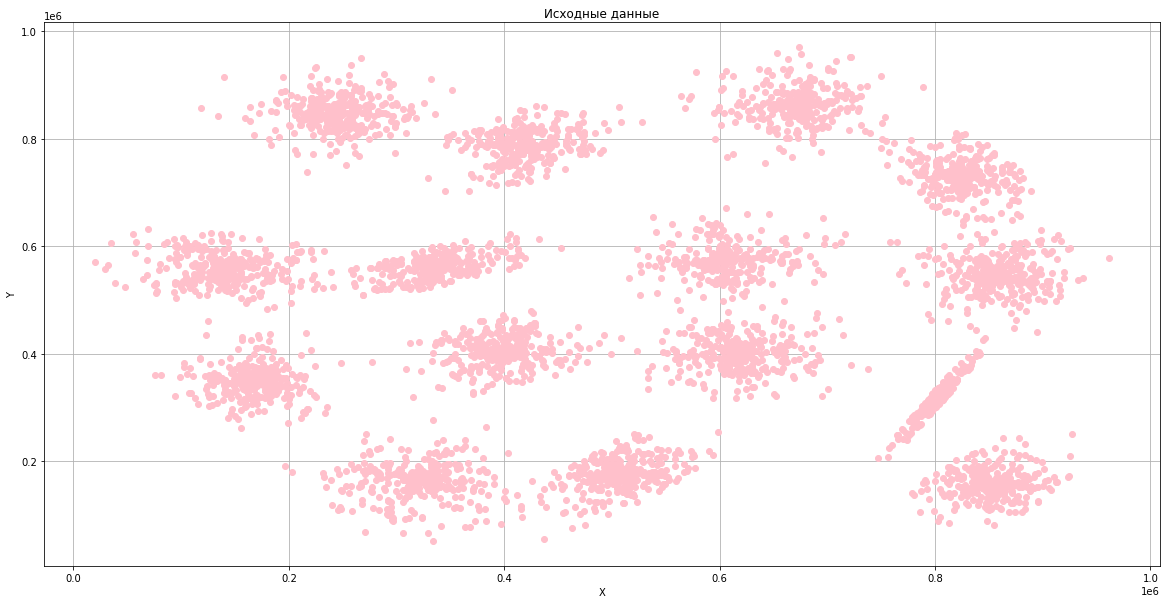

In [2]:
import matplotlib.pyplot as plt

plt.figure(figsize = (20, 10))

plt.plot(data[:, 0], data[:, 1], 'o', color='pink')

plt.xlabel("X")
plt.ylabel("Y")
plt.title("Исходные данные")
plt.grid(True)

plt.show()

Расчет на основе модели KMeans

In [4]:
from sklearn.cluster import KMeans

# Подбор констант
N_CLUSTERS_CONST = 15
N_INIT = 100

kmeans = KMeans(n_clusters=N_CLUSTERS_CONST, n_init=N_INIT)
kmeans.fit(data)
kmeans_clusters = kmeans.predict(data)
kmeans_centroinds = kmeans.cluster_centers_

print(f"Кол-во кластеров: {len(set(kmeans_clusters))}")

Кол-во кластеров: 15


Результат рассчета (модель KMeans)

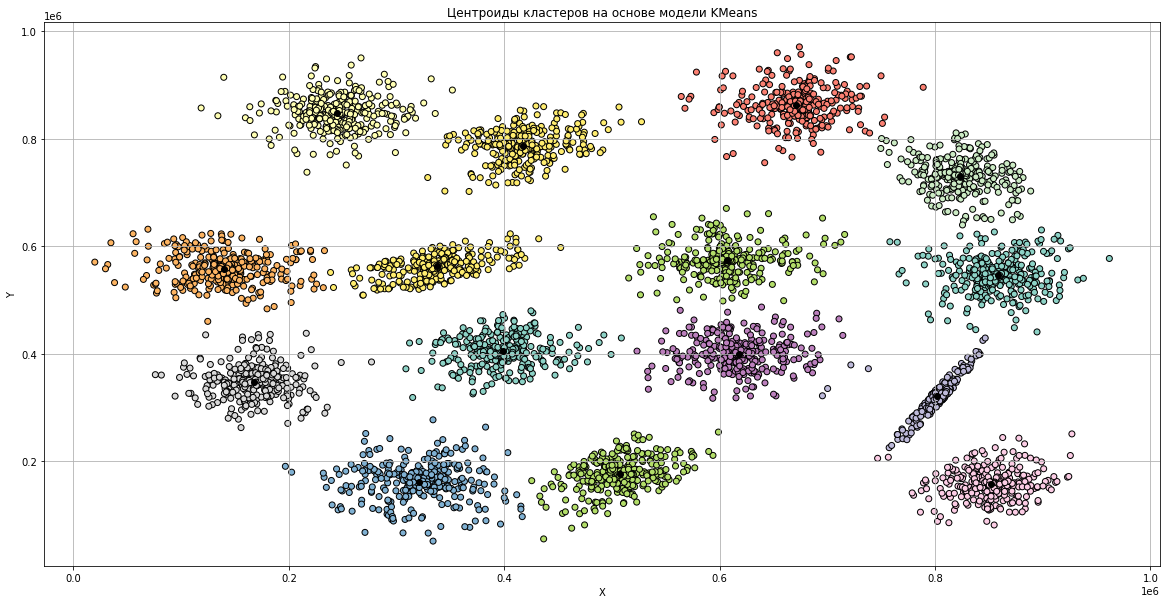

In [5]:
import matplotlib.pyplot as plt

plt.figure(figsize = (20, 10))

plt.plot(kmeans_centroinds[:, 0], kmeans_centroinds[:, 1], 'o', color='black')
plt.scatter(data[:, 0], data[:, 1], c=kmeans_clusters, cmap='Set3', marker='o', edgecolors='k')

plt.xlabel("X")
plt.ylabel("Y")
plt.title("Центроиды кластеров на основе модели KMeans")
plt.grid(True)

plt.show()

Расчет на основе модели AffinityPropagation

In [31]:
from sklearn.cluster import AffinityPropagation

# Подбор констант
PREFERENCE_CONST = -1000000000000
DAMPING_CONST = 0.8

affinity_propagation = AffinityPropagation(damping=DAMPING_CONST, preference=PREFERENCE_CONST)
affinity_propagation.fit(data)
affinity_clusters = affinity_propagation.predict(data)
affinity_centroids = data[affinity_propagation.cluster_centers_indices_]

print(f"Кол-во кластеров: {len(set(affinity_clusters))}")

Кол-во кластеров: 15


Результат рассчета (модель AffinityPropagation)

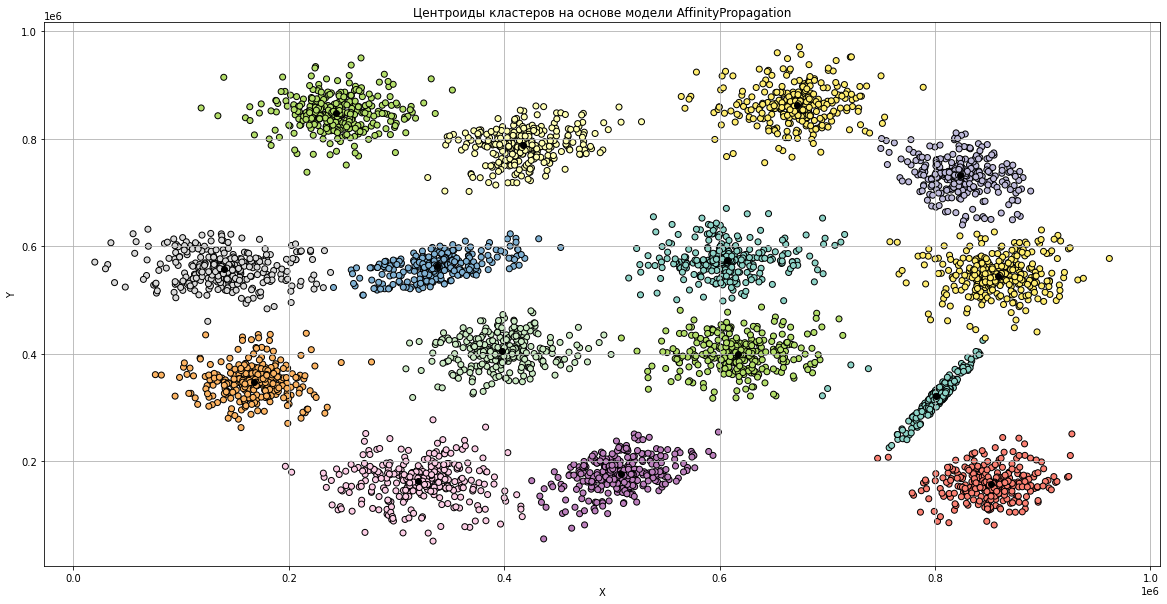

In [7]:
import matplotlib.pyplot as plt

plt.figure(figsize = (20, 10))

plt.plot(affinity_centroids[:, 0], affinity_centroids[:, 1], 'o', color='black')
plt.scatter(data[:, 0], data[:, 1], c=affinity_clusters, cmap='Set3', marker='o', edgecolors='k')

plt.xlabel("X")
plt.ylabel("Y")
plt.title("Центроиды кластеров на основе модели AffinityPropagation")
plt.grid(True)

plt.show()

Расчет на основе модели MeanShift

In [8]:
from sklearn.cluster import MeanShift

# Подбор констант
BANDWIDTH_CONST = 100000

mean_shift = MeanShift(bandwidth=BANDWIDTH_CONST)
mean_shift.fit(data)
mean_clusters = mean_shift.predict(data)
mean_centroids = mean_shift.cluster_centers_

print(f"Кол-во кластеров: {len(set(mean_clusters))}")

Кол-во кластеров: 15


Результат рассчета (модель MeanShift)

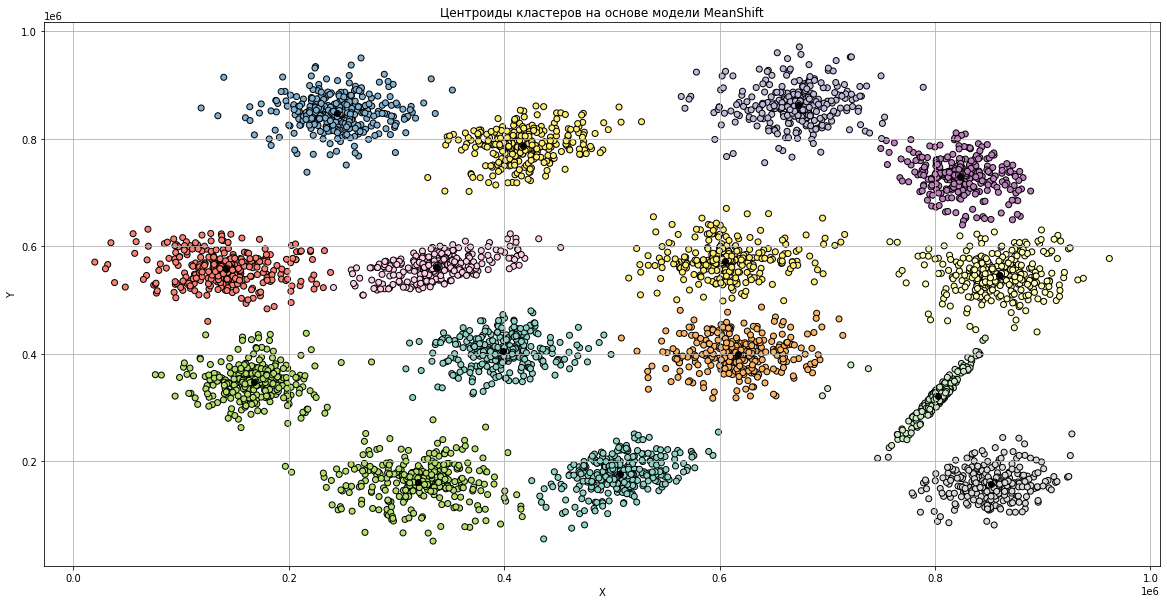

In [9]:
import matplotlib.pyplot as plt

plt.figure(figsize = (20, 10))

plt.plot(mean_centroids[:, 0], mean_centroids[:, 1], 'o', color='black')
plt.scatter(data[:, 0], data[:, 1], c=mean_clusters, cmap='Set3', marker='o', edgecolors='k')

plt.xlabel("X")
plt.ylabel("Y")
plt.title("Центроиды кластеров на основе модели MeanShift")
plt.grid(True)

plt.show()

Расчет на основе модели AgglomerativeClustering

In [6]:
from sklearn.cluster import AgglomerativeClustering

# Подбор констант
N_CLUSTERS_CONST = 15

agglomerative_clustering = AgglomerativeClustering(n_clusters=N_CLUSTERS_CONST)
agglomerative_clusters = agglomerative_clustering.fit_predict(data)

# Отдельно считаем центры 
agglomerative_labels = agglomerative_clustering.labels_
unique_agglomerative_labels = set(agglomerative_labels)

agglomerative_centroids = []
for label in unique_agglomerative_labels:
    cluster_points = data[agglomerative_labels == label]
    cluster_center = np.mean(cluster_points, axis=0)
    agglomerative_centroids.append(cluster_center)

agglomerative_centroids = np.array(agglomerative_centroids)

print(f"Кол-во кластеров: {len(set(agglomerative_clusters))}")

Кол-во кластеров: 15


Результат рассчета (модель AgglomerativeClustering)

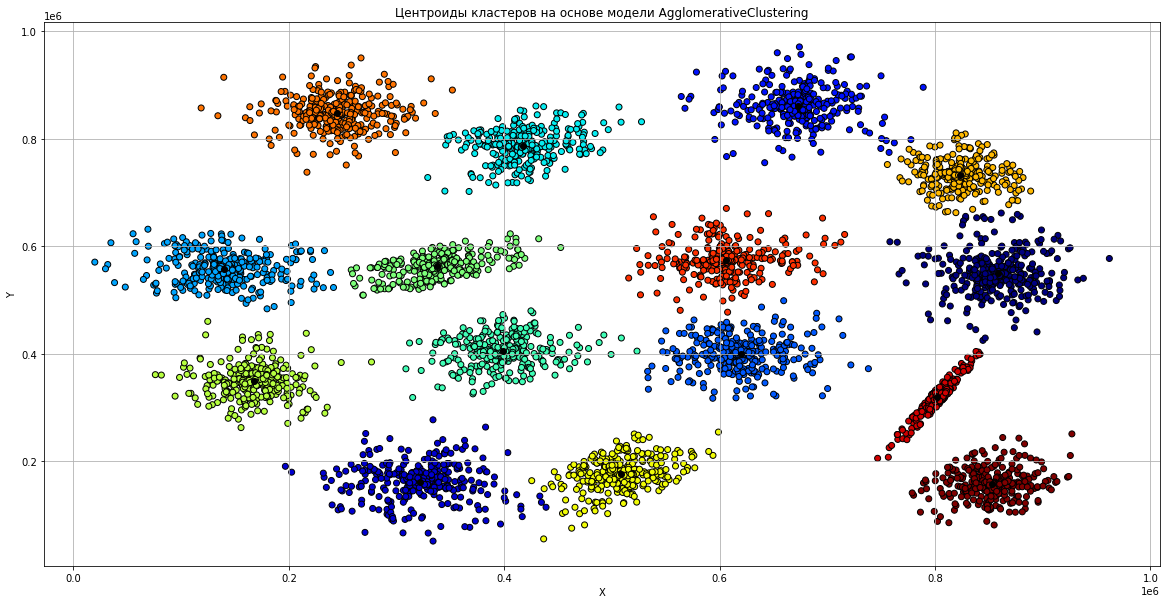

In [7]:
import matplotlib.pyplot as plt

plt.figure(figsize = (20, 10))

plt.plot(agglomerative_centroids[:, 0], agglomerative_centroids[:, 1], 'o', color = 'black')
plt.scatter(data[:, 0], data[:, 1], c=agglomerative_clusters, cmap='jet', marker='o', edgecolors='k')

plt.xlabel("X")
plt.ylabel("Y")
plt.title("Центроиды кластеров на основе модели AgglomerativeClustering")
plt.grid(True)

plt.show()

Расчет на основе модели DBSCAN

In [13]:
from sklearn.cluster import DBSCAN

# Подбор констант
EPS_CONST = 50000
MIN_SAMPLES_CONST = 150

dbscan = DBSCAN(eps = EPS_CONST, min_samples=MIN_SAMPLES_CONST)
dbscan.fit(data)
dbscan_clusters = dbscan.labels_

# Отдельно считаем центры 
dbscan_labels = dbscan.labels_
unique_dbscan_labels = set(dbscan_labels)

dbscan_centroids = []
for label in unique_dbscan_labels:
    if label != -1:  # В случае выбросов
        cluster_points = data[dbscan_labels == label]
        cluster_center = np.mean(cluster_points, axis=0)
        dbscan_centroids.append(cluster_center)

dbscan_centroids = np.array(dbscan_centroids)

print(f"Кол-во кластеров: {len(set(dbscan_clusters)) - 1}") # -1, потому что присутсвуют выбросы (шумы)

Кол-во кластеров: 15


Результат рассчета (модель DBSCAN)

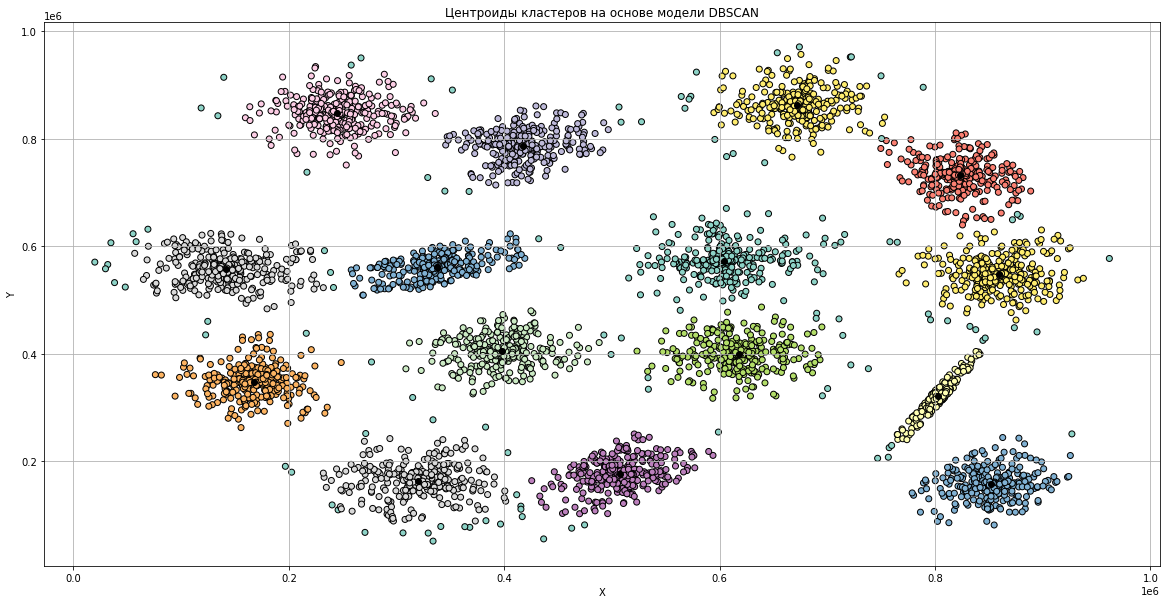

In [14]:
import matplotlib.pyplot as plt

plt.figure(figsize = (20, 10))

plt.plot(dbscan_centroids[:, 0], dbscan_centroids[:, 1], 'o', color='black')
plt.scatter(data[:, 0], data[:, 1], c=dbscan_clusters, cmap='Set3', marker='o', edgecolors='k')

plt.xlabel("X")
plt.ylabel("Y")
plt.title("Центроиды кластеров на основе модели DBSCAN")
plt.grid(True)

plt.show()